# Discrétisation par intervalles de fréquence égale

La discrétisation à fréquence égale divise les valeurs de la variable en intervalles qui portent la même proportion d'observations. La largeur d'intervalle est déterminée par des quantiles, et par conséquent différents intervalles peuvent avoir des largeurs différentes. En résumé, la discrétisation à fréquence égale par quantiles consiste à diviser la variable continue en N quantiles, N à définir par l'utilisateur. Cette technique de discrétisation est particulièrement utile pour les variables asymétriques car elle répartit les observations sur les différentes classes de manière égale. Dans cette recette, nous effectuerons une discrétisation à fréquence égale à l'aide de pandas, scikit-learn.

Commençons par importer les bibliothèques Python nécessaires et préparons l'ensemble de données :

In [1]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

# for discretization
from sklearn.preprocessing import KBinsDiscretizer


Chargeons les variables prédictives et cibles de l'ensemble de données Boston House Prices dans une dataframe

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Les limites des intervalles, c'est-à-dire les quantiles, doivent être apprises à l'aide de variables dans le train, puis utilisées pour discrétiser les variables dans le train et les tests.

In [3]:

# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## Discrétisation par intervalles de fréquence égale avec Pandas

Pour diviser la variable LSTAT en 10 quantiles, nous utilisons pandas qcut(), qui renvoie à la fois la variable discrétisée et les limites quantiles, que nous capturons respectivement comme une colonne dans la dataframe et une variable individuelle

In [4]:
# let's use pandas qcut (quantile cut) and I indicate that
# we want 10 bins.

# retbins = True indicates that I want to capture the limits
# of the intervals (so I can then use them to cut the test set)

X_train['lstat_disc'], intervals = pd.qcut(
    X_train['LSTAT'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

Si nous imprimons les valeurs des intervalles avec la commande print(intervals), nous obtenons la sortie suivante :

In [5]:
# let's visualize the interval edges

intervals

array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
       18.06 , 22.453, 36.98 ])

Imprimons les 10 premières observations de la variable discrétisée et d'origine, côte à côte :

In [6]:
# let's have a look at the result: compare original
# and discretized variable

print(X_train[['LSTAT', 'lstat_disc']].head(10))

     LSTAT       lstat_disc
141  34.41  (22.453, 36.98]
272   7.73     (7.528, 9.5]
135  16.96  (15.565, 18.06]
298   4.97   (4.623, 6.202]
122  17.93  (15.565, 18.06]
22   18.72  (18.06, 22.453]
68   13.09   (11.16, 13.26]
20   21.02  (18.06, 22.453]
437  26.45  (22.453, 36.98]
14   10.26     (9.5, 11.16]


In [7]:
# let's check the percentage of observations per interval
# they should be roughly the same

X_train['lstat_disc'].value_counts() / len(X_train)

(7.528, 9.5]       0.104520
(22.453, 36.98]    0.101695
(15.565, 18.06]    0.101695
(13.26, 15.565]    0.101695
(1.729, 4.623]     0.101695
(11.16, 13.26]     0.098870
(6.202, 7.528]     0.098870
(4.623, 6.202]     0.098870
(18.06, 22.453]    0.096045
(9.5, 11.16]       0.096045
Name: lstat_disc, dtype: float64

Notez comment différents intervalles ont une proportion similaire d'observations dans la sortie du bloc de code précédent


Maintenant, discrétisons LSTAT dans l'ensemble de test, en utilisant la méthode pandas cut() et les limites d'intervalle déterminées à l'étape précédente.

In [8]:
# and now let's discretise LSTAT in the test set
# note how we now use pandas cut() instead of qcut() and
# pass the intervals we determined for the train set

X_test['lstat_disc'] = pd.cut(x = X_test['LSTAT'], bins=intervals)

In [9]:
# let's check the percentage of observations per interval
# should be roughly the same

X_test['lstat_disc'].value_counts() / len(X_test)

(7.528, 9.5]       0.131579
(22.453, 36.98]    0.118421
(13.26, 15.565]    0.118421
(11.16, 13.26]     0.111842
(15.565, 18.06]    0.098684
(4.623, 6.202]     0.098684
(9.5, 11.16]       0.092105
(1.73, 4.623]      0.085526
(18.06, 22.453]    0.078947
(6.202, 7.528]     0.059211
Name: lstat_disc, dtype: float64

In [10]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,lstat_disc
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,"(22.453, 36.98]"
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,"(7.528, 9.5]"
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,"(15.565, 18.06]"
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97,"(4.623, 6.202]"
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,"(15.565, 18.06]"


Text(0, 0.5, 'Number of observations per bin')

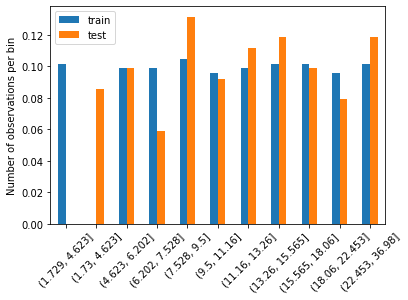

In [11]:

# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

# determine proportion of observations per interval
t1 = X_train['lstat_disc'].value_counts() / len(X_train)
t2 = X_test['lstat_disc'].value_counts() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

## Discrétisation par intervalles de fréquence égale avec scikit-learn
Faisons maintenant la discrétisation à fréquence égale avec scikit-learn. Tout d'abord, divisons les données d'origine en ensembles d'apprentissage et de test. Ensuite, nous mettons en place un discrétiseur :

In [12]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

Créons un discrétiseur à fréquence égale en définissant la stratégie sur quantile et le nombre de cases à 10 :

In [13]:
# let's set up a discretizer based on quantiles to sort values in 10 bins

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

# fit the discretizer so that it learns the interval edges
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='quantile')

KBinsDiscretiser () de Scikit-learn discrétisera toutes les variables de l'ensemble de données, nous devons donc utiliser le transformateur uniquement dans la tranche de la dataframe qui contient les variables d'intérêt

In [14]:
# the interval edges are stored in a transformer attribute:

disc.bin_edges_

array([array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
       18.06 , 22.453, 36.98 ]),
       array([ 1.1742 ,  1.66132,  1.9793 ,  2.26121,  2.64774,  3.2157 ,
        3.7965 ,  4.45352,  5.40702,  6.8147 , 12.1265 ]),
       array([3.561 , 5.5783, 5.8532, 5.9628, 6.1048, 6.2155, 6.3946, 6.5632,
       6.794 , 7.185 , 8.78  ])], dtype=object)

In [15]:

# let's transform the train set, remember it returns a NumPy array
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

train_t.head()

,LSTAT,DIS,RM
0,9.0,0.0,0.0
1,3.0,6.0,6.0
2,7.0,2.0,5.0
3,1.0,9.0,5.0
4,7.0,2.0,2.0


In [17]:

# let's do the same for the test set

test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

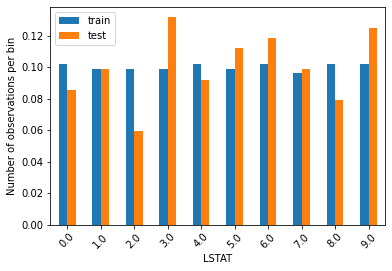

In [18]:

# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

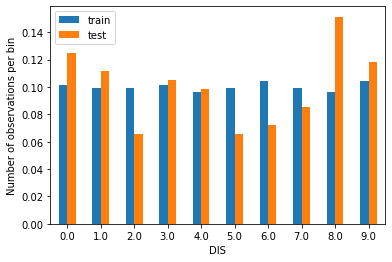

In [19]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

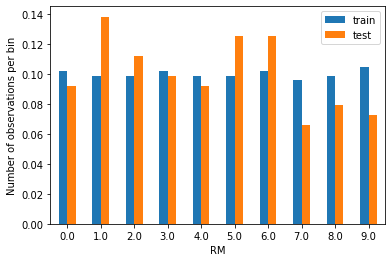

In [20]:

# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Avec une discrétisation à fréquence égale, nous avons trié les valeurs des variables en intervalles avec une proportion d'observations similaire. Les limites d'intervalle ont été déterminées par les quantiles. Tout d'abord, nous avons défini arbitrairement le nombre de cases à 10. Ensuite, nous avons utilisé la méthode qcut() de pandas pour déterminer les limites des intervalles et trier la variable LSTAT du train dans ces intervalles. Ensuite, en utilisant la méthode cut() des pandas et les limites d'intervalle déterminées avec la méthode qcut() des pandas, nous avons discrétisé LSTAT dans l'ensemble de test

Enfin, nous avons utilisé pandas value_counts() pour compter le nombre d'observations par intervalle et l'avons divisé par le nombre total d'observations, obtenu avec la méthode Python len(), pour déterminer la proportion d'observations par intervalle.

Enfin, nous avons discrétisé les variables avec KBinsDiscretizer() de scikit-learn, en indiquant 10 comme nombre de d'intervale et en définissant la stratégie sur quantile. Avec la méthode fit(), le transformateur apprenait et stockait les limites des intervalles dans son attribut bin_edges_, et avec la méthode transform(), le discrétiseur triait les valeurs des variables sur chaque intervalle.